Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.optimizers import SGD
from keras.constraints import MaxNorm
from keras.layers import Dense,Dropout
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
import tensorflow as tf
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


Reading CSV File

In [3]:
iris = pd.read_csv('iris_extended.csv')

Have a look at the Data.

In [4]:
iris.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


Let's Check if any Null Value is there or not.

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

No null Values we can proceed further.

Describing our Dataset.
1) Row Count.
2)Mean Values.
3)Spread of data.
and more info.

In [6]:
iris.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,17.870807,5.689068,2.003853,4.016732,1.996762,5.422667,2.08795,1.863317,8.355267,15.052733,60.144650,4.208441,2.106480,15.755674
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.388978,4.585312,0.507508,2.070668,1.035622,5.921786,1.27443,1.004847,3.172975,4.663109,10.224305,0.399956,1.119309,21.891577
min,50.100000,4.040000,1.700000,0.960000,0.050000,9.048000,0.086000,0.978774,1.587379,0.745902,0.841121,-1.55000,-0.340000,3.310000,3.830000,35.160000,3.007989,0.293258,0.818662
25%,110.875000,5.210000,2.690000,1.640000,0.360000,15.554550,0.565825,1.639104,2.855016,1.223277,1.650452,1.14000,1.090000,5.310000,11.280000,52.302500,3.943926,0.752213,2.005655
50%,171.300000,5.840000,3.030000,4.300000,1.290000,17.646400,5.525400,1.970738,3.448642,1.442773,2.170656,1.95500,1.590000,7.925000,15.020000,59.170000,4.200762,2.350617,3.059424
75%,239.125000,6.520000,3.390000,5.200000,1.740000,20.007275,9.256725,2.293932,4.486058,3.059940,9.251453,3.29000,2.740000,10.715000,18.527500,67.305000,4.472949,3.042487,30.764892
max,299.900000,9.120000,4.760000,7.840000,2.990000,29.722600,23.128000,4.082902,34.400000,5.410000,55.800000,4.66000,4.560000,17.890000,29.850000,86.930000,5.451844,4.809158,183.620930


Let's drop categorical columns as we don't need such.

In [7]:
iris.drop('soil_type',axis=1,inplace=True)

Splitting X And Y

In [8]:
X = iris.drop('species',axis=1)
y = iris['species']

In [9]:
X

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,161.8,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,291.4,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,144.3,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,114.6,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,9.000000,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,110.9,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,268.8,5.36,2.51,5.16,1.93,13.4536,9.9588,2.135458,2.673575,1.038760,1.300518,0.20,0.58,11.61,11.52,59.46,3.667915,3.155757,1.350926
1196,125.4,7.49,3.06,7.68,2.17,22.9194,16.6656,2.447712,3.539171,0.975260,1.410138,-0.19,0.89,13.85,6.99,77.12,4.787421,4.082352,1.375252
1197,73.6,6.79,3.25,4.72,2.26,22.0675,10.6672,2.089231,2.088496,1.438559,1.438053,2.07,0.99,13.13,9.16,74.39,4.697606,3.266068,2.068725
1198,239.6,6.38,2.24,5.30,1.71,14.2912,9.0630,2.848214,3.099415,1.203774,1.309942,1.08,0.53,11.01,6.46,73.90,3.780370,3.010482,1.576873


In [10]:
x = X.columns
x

Index(['elevation', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'sepal_area', 'petal_area', 'sepal_aspect_ratio',
       'petal_aspect_ratio', 'sepal_to_petal_length_ratio',
       'sepal_to_petal_width_ratio', 'sepal_petal_length_diff',
       'sepal_petal_width_diff', 'petal_curvature_mm',
       'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt',
       'petal_area_sqrt', 'area_ratios'],
      dtype='object')

In [11]:
y

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
1195    virginica
1196    virginica
1197    virginica
1198    virginica
1199    virginica
Name: species, Length: 1200, dtype: object

Our data is not on same scale so let's Standardize out data and have a look.

In [12]:
sc = StandardScaler()

In [13]:
iris1 = sc.fit_transform(X)

In [14]:
X = pd.DataFrame(iris1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.162139,-0.870654,0.677816,-1.228486,-1.275829,-0.081240,-1.148201,-0.967199,1.106849,1.110501,1.299595,1.124148,1.281010,-0.953846,0.703100,-0.678534,-0.034343,-1.299099,1.165765
1,1.627148,-0.492057,1.892466,-1.290818,-1.124850,1.276195,-1.117722,-1.282814,0.057205,1.531059,0.933094,1.461694,1.808673,-0.774129,1.157922,-0.745070,1.257188,-1.210254,1.071608
2,-0.403748,-0.941641,-0.479897,-1.324818,-1.111125,-1.059997,-1.119358,-0.359602,-0.071654,1.422565,0.328712,1.210497,0.554229,-0.849799,2.052548,-0.968161,-1.074448,-1.214724,0.448224
3,-0.813793,-1.485873,0.734753,-1.290818,-1.399357,-0.563593,-1.184484,-1.291190,2.407603,1.000703,2.502421,0.802301,1.400481,-1.212386,1.685687,-0.909453,-0.533391,-1.426903,2.084387
4,-0.864876,-1.237419,-0.347045,-1.460816,-1.275829,-1.166415,-1.171459,-0.618884,0.344978,1.880164,0.948723,1.202647,0.743391,-1.363727,1.396060,-1.915320,-1.194522,-1.377291,1.269052


Our Target values are categorical so first we need to convert it into numerical values as we have three target values so we have to use Label Encoder.

In [15]:
le = LabelEncoder()

In [16]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 2, 2, 2])

In [17]:
y = pd.DataFrame(y)
y.columns = ['species']

In [18]:
y.value_counts()

species
0          400
1          400
2          400
dtype: int64

In [19]:
X.columns = x
X

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,-0.162139,-0.870654,0.677816,-1.228486,-1.275829,-0.081240,-1.148201,-0.967199,1.106849,1.110501,1.299595,1.124148,1.281010,-0.953846,0.703100,-0.678534,-0.034343,-1.299099,1.165765
1,1.627148,-0.492057,1.892466,-1.290818,-1.124850,1.276195,-1.117722,-1.282814,0.057205,1.531059,0.933094,1.461694,1.808673,-0.774129,1.157922,-0.745070,1.257188,-1.210254,1.071608
2,-0.403748,-0.941641,-0.479897,-1.324818,-1.111125,-1.059997,-1.119358,-0.359602,-0.071654,1.422565,0.328712,1.210497,0.554229,-0.849799,2.052548,-0.968161,-1.074448,-1.214724,0.448224
3,-0.813793,-1.485873,0.734753,-1.290818,-1.399357,-0.563593,-1.184484,-1.291190,2.407603,1.000703,2.502421,0.802301,1.400481,-1.212386,1.685687,-0.909453,-0.533391,-1.426903,2.084387
4,-0.864876,-1.237419,-0.347045,-1.460816,-1.275829,-1.166415,-1.171459,-0.618884,0.344978,1.880164,0.948723,1.202647,0.743391,-1.363727,1.396060,-1.915320,-1.194522,-1.377291,1.269052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.315128,-0.634031,-1.030286,0.766150,1.016305,-1.303948,0.931564,0.259424,-0.648929,-0.925435,-0.696389,-1.482025,-1.277658,1.026195,-0.757908,-0.066991,-1.352029,0.937823,-0.658278
1196,-0.664686,1.886002,0.013554,2.194128,1.345714,1.490331,2.394844,0.874950,-0.230728,-0.986776,-0.677870,-1.788172,-0.969025,1.732451,-1.729767,1.660986,1.448214,1.765996,-0.657167
1197,-1.379849,1.057822,0.374153,0.516820,1.469242,1.238852,1.086122,0.168299,-0.931603,-0.539227,-0.673154,-0.014091,-0.869466,1.505440,-1.264219,1.393864,1.223558,1.036417,-0.625476
1198,0.911986,0.572746,-1.542716,0.845482,0.714348,-1.056690,0.736120,1.664433,-0.443190,-0.766031,-0.694797,-0.791233,-1.327438,0.837019,-1.843473,1.345919,-1.070742,0.807979,-0.647953


In [20]:
X.shape,y.shape

((1200, 19), (1200, 1))

for later if we need to join our splitted columns and de-standardize the data.

In [21]:
#horizontal_concat = pd.concat([iris1,y],axis=1)
#print(horizontal_concat.head())
'''iris2 = sc.inverse_transform(iris1)
iris2 = pd.DataFrame(iris2,columns= X.columns)
iris2.head()'''

'iris2 = sc.inverse_transform(iris1)\niris2 = pd.DataFrame(iris2,columns= X.columns)\niris2.head()'

Here starts the main-course.

In [22]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25,random_state=1)

In [23]:
X_train.shape,X_test.shape

((900, 19), (300, 19))

let's try to apply Logistic Regression First.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [26]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 2,
       0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1,
       2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1,

In [27]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([1, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2,
       1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1,
       2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2])

<function matplotlib.pyplot.show(close=None, block=None)>

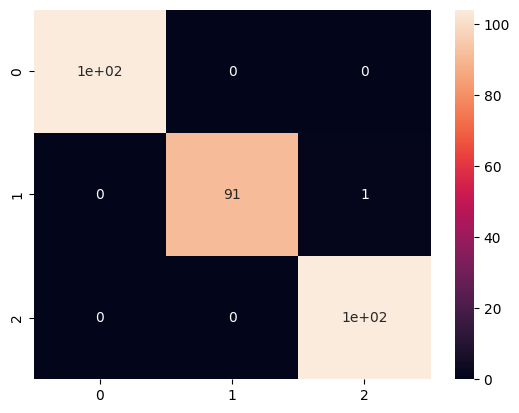

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test,y_pred_test)
sns.heatmap(conf_mat,annot=True,)
plt.show

In [29]:
accuracy_score(y_test,y_pred_test)

0.9966666666666667

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      0.99      0.99        92
           2       0.99      1.00      1.00       104

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



Accuracy score looks great.

Now build the model for ANN.

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
import os
#print(os.listdir("../input"))

In [33]:
model = keras.Sequential([
    keras.layers.Dense(19,input_dim=19,),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(3,activation='softmax') # Softmax for multi class classification.
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])# sparse categorical crossentropy for more than 2 class labels.
model.fit(X_train,y_train,epochs=50,batch_size=16)

Epoch 1/50
57/57 [==============================] - 4s 8ms/step - loss: 0.9601 - accuracy: 0.6567
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.5101 - accuracy: 0.8833
Epoch 3/50
57/57 [==============================] - 1s 10ms/step - loss: 0.2452 - accuracy: 0.9522
Epoch 4/50
57/57 [==============================] - 1s 9ms/step - loss: 0.1267 - accuracy: 0.9822
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 0.0741 - accuracy: 0.9856
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0484 - accuracy: 0.9889
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0361 - accuracy: 0.9944
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.0285 - accuracy: 0.9956
Epoch 9/50
57/57 [==============================] - 0s 8ms/step - loss: 0.0238 - accuracy: 0.9956
Epoch 10/50
57/57 [==============================] - 1s 15ms/step - loss: 0.0205 - accuracy: 0.9956
Epoch 11/50
57/57

In [34]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy on the test set: {accuracy}")

10/10 [==============================] - 0s 6ms/step
Accuracy on the test set: 0.9933333333333333


Adding one dropout layer although our model predicted very well on both training and testing data but still doing to check what it will do.

**Dropout regularization** is a technique used in neural networks to prevent __overfitting__.

Dropout Regularization.

In [35]:
model = keras.Sequential([
    keras.layers.Dense(19,input_dim=19),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5,activation='relu'),

    keras.layers.Dense(3,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=16)

Epoch 1/50
57/57 [==============================] - 4s 5ms/step - loss: 0.8812 - accuracy: 0.5811
Epoch 2/50
57/57 [==============================] - 0s 5ms/step - loss: 0.6117 - accuracy: 0.7111
Epoch 3/50
57/57 [==============================] - 0s 5ms/step - loss: 0.4809 - accuracy: 0.7411
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 0.3872 - accuracy: 0.8456
Epoch 5/50
57/57 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.9200
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1860 - accuracy: 0.9567
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1283 - accuracy: 0.9700
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0999 - accuracy: 0.9756
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0718 - accuracy: 0.9756
Epoch 10/50
57/57 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.9778
Epoch 11/50
57/57 [

In [36]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy on the test set: {accuracy}")

10/10 [==============================] - 0s 2ms/step
Accuracy on the test set: 0.99


Adding one more dropout layer.

In [37]:
model = keras.Sequential([
    keras.layers.Dense(19,input_dim=19),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=16,verbose=1)

Epoch 1/50
57/57 [==============================] - 1s 4ms/step - loss: 1.0932 - accuracy: 0.5056
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.7452 - accuracy: 0.6356
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.6878
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.5561 - accuracy: 0.7422
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.7722
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.8333
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.8711
Epoch 8/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3826 - accuracy: 0.9111
Epoch 9/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3625 - accuracy: 0.9233
Epoch 10/50
57/57 [==============================] - 0s 4ms/step - loss: 0.3179 - accuracy: 0.9233
Epoch 11/50
57/57 [

In [38]:
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy on the test set: {accuracy}")

10/10 [==============================] - 0s 3ms/step
Accuracy on the test set: 0.9966666666666667


That's how we can build **__ANN Model__** and can also add **Dropout Layers** if our model __**Overfits**__ .